In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cymandelbulb

%matplotlib notebook

In [2]:
# %timeit get_data(0, 800, 800)
# 1 loop, best of 3: 7.17 s per loop
# %timeit cymandelbulb.get_data(0, 200, 200)
# 10 loops, best of 3: 27.6 ms per loop

In [3]:
nx = ny = 200
layers = [cymandelbulb.mandelbrot_image(layer, image_width=nx, image_height=ny,
                                        scale=(4., 4., 50.0), n=8)
          for layer in range(-60, 60)]

In [4]:
layer_data = np.array(layers)

In [5]:
layer_data.shape

(120, 200, 200)

In [6]:
import yt
bbox = np.array([[-1., 1.], [-1., 1.], [-1., 1.]])
yt_data = dict(density=(layer_data.astype(float) / 255.0))
ds = yt.load_uniform_grid(yt_data, layer_data.shape, 3.08e24, bbox=bbox, nprocs=4)

/Users/klauer/miniconda3/envs/nsls2/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
yt : [INFO     ] 2016-04-06 14:13:28,076 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-04-06 14:13:28,077 Parameters: domain_dimensions         = [120 200 200]
yt : [INFO     ] 2016-04-06 14:13:28,077 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2016-04-06 14:13:28,078 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-04-06 14:13:28,079 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2016-04-06 14:13:31,017 Max Value is 3.38227e-74 at -0.9916666666666667 -0.3650000000000000 -0.0449999999999999
yt : [INFO     ] 2016-04-06 14:13:31,554 Projection completed
yt : [INFO     ] 2016-04-06 14:13:31,555 xlim = -1.365000 0.635000
yt : [INFO     ] 2016-04-06 14:13:31,556 ylim = -1.045000 0.955000
yt : [INFO     ] 2016-04-06 14:13:31,558 xlim = -1.365000 0.635000
yt : [INFO     ] 2016-04-06 14:13:31,558 ylim = -1.045000 0.955000
yt : [INFO     ] 2016-04-06 14:13:31,560 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/klauer/miniconda3/envs/nsls2/lib/python3.4/site-packages/matplotlib/colors.py:1018: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



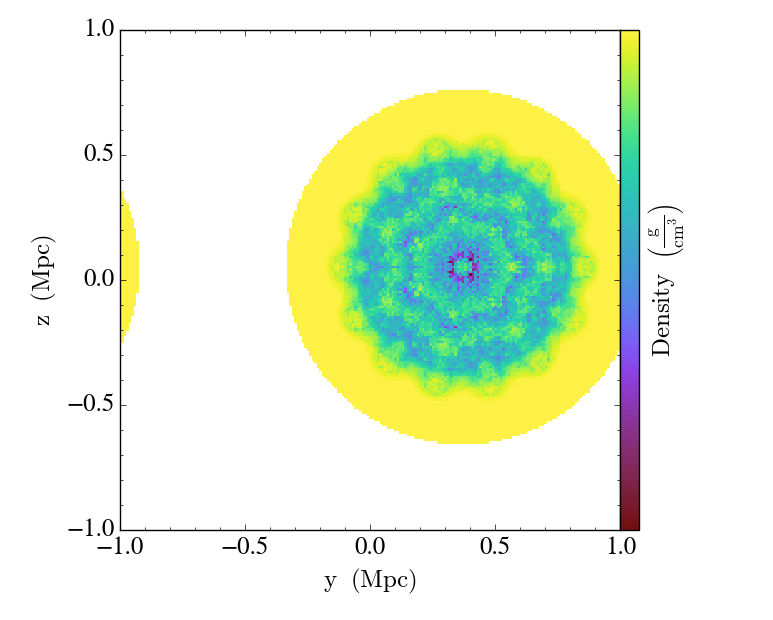

In [7]:
p = yt.ProjectionPlot(ds, "x", "density", center='m', width=2,
                   weight_field='density')
p.set_figure_size(5)
p.show()

In [11]:
# this requires yt version >= 3.3! (current master 'yt' branch)
print(yt.__version__)
sc = yt.create_scene(ds)

yt : [INFO     ] 2016-04-06 14:14:14,344 Setting default field to ('gas', 'density')
yt : [INFO     ] 2016-04-06 14:14:14,345 Creating default volume
/Users/klauer/Repos/yt/yt/utilities/amr_kdtree/amr_kdtree.py:307: RuntimeWarning: divide by zero encountered in log10
  if self.log_fields[i]: vcd = np.log10(vcd)
/Users/klauer/Repos/yt/yt/utilities/amr_kdtree/amr_kdtree.py:307: RuntimeWarning: invalid value encountered in log10
  if self.log_fields[i]: vcd = np.log10(vcd)
yt : [INFO     ] 2016-04-06 14:14:14,535 Creating default transfer function
yt : [INFO     ] 2016-04-06 14:14:14,535 Calculating data bounds. This may take a while.  Set the .bounds to avoid this.


3.3-dev


yt : [INFO     ] 2016-04-06 14:14:04,815 Rendering scene (Can take a while).


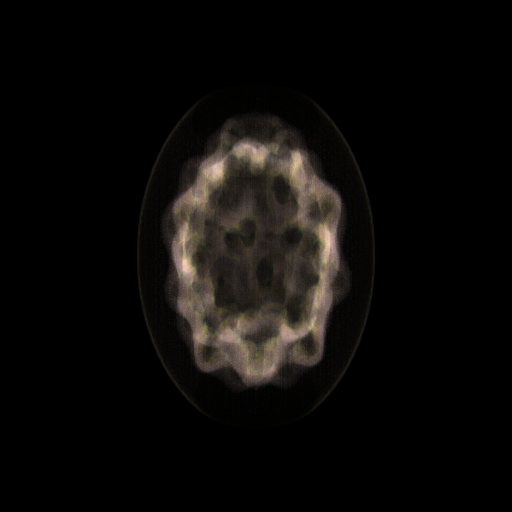

In [10]:
sc

In [0]:
# render a few different frames, rotating the fractal
cam = sc.camera

frame = 0
# Zoom out by a factor of 2 over 5 frames
n_images = 40
cam.set_position
for _ in cam.iter_rotate(np.pi / 2, n_images, rot_vector=(0, 1, 0)):
    sc.render()
    frame += 1
    sc.save('frame_{}.png'.format(frame))

In [0]:
# cam.set_position(...)

In [0]:
from ipywidgets import interact

images = [plt.imread('frame_{}.png'.format(i)) for i in range(1, n_images + 1)]

print(len(images), images)
def browse_images(images):
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Image {}'.format(i))
        plt.show()
    interact(view_image, i=(0, len(images) - 1))

browse_images(images)

In [0]:
# original pure python version

from math import sqrt, cos, sin, atan2
import numpy as np

n = 8

def mandel(x0, y0, z0):
    x, y, z = 0.0, 0.0, 0.0
    for i in range(32):
        r = sqrt(x*x + y*y + z*z)
        theta = atan2(sqrt(x*x + y*y), z)
        phi = atan2(y, x)

        x = r**n * sin(theta*n) * cos(phi*n) + x0
        y = r**n * sin(theta*n) * sin(phi*n) + y0
        z = r**n * cos(theta*n)              + z0

        if x**2 + y**2 + z**2 > 2:
            return 256 - (i * 4)
    else:
        return 0


def mandelbrot_function(layer, xx, yy, *, width=800, height=800):
    x = 4.0 * (xx - (width / 2.0)) / width
    y = 4.0 * (yy - (height / 2.0)) / height
    z = layer / 50.0
    return mandel(x, y, z)


def get_data(layer, width, height):
    data = [min(255, max(0, mandelbrot_function(layer, x, y, width=width, height=height)))
            for x in range(width)
            for y in range(height)]
    return np.asarray(data).reshape(width, height)